In [60]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
!pip install chardet
import chardet
dataset = pd.read_csv('/content/drive/MyDrive/Developed_Countries_Final.csv')
dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Page Name,User Name,Facebook Id,Page Category,Page Admin Top Country,Page Description,Page Created,Likes at Posting,Followers at Posting,Post Created,...,Topic_5_Valence,Topic_6_Valence,Topic_7_Valence,Topic_8_Valence,Topic_9_Valence,Topic_10_Valence,Topic_11_Valence,Topic_12_Valence,FOG_Score,NRC_Emotions
0,Cat Electric Power,Caterpillar.Electric.Power,1.000650e+14,PRODUCT_SERVICE,US,Caterpillar and your local Cat® dealer are rea...,18-11-2008 19:51,213061.0,220357.0,2024-01-19 22:00:15 GMT,...,-0.000227,2.733705e-06,0.005646,0.000076,0.024164,0.000025,0.000090,-0.000010,15.00,"{'positive': 6, 'trust': 5, 'anticipation': 2,..."
1,BullSnot,TheBullSnot,1.000640e+14,CHEMICALS_GASSES,US,"At Brown Ox Ventures, our goal is to provide o...",26-11-2015 01:38,5067.0,7888.0,2023-06-28 19:45:51 BST,...,-0.003912,5.871810e-03,0.000507,0.000019,0.000428,0.000577,0.000022,-0.000102,9.38,"{'anticipation': 11, 'positive': 17, 'trust': ..."
2,Hydrogen Cars Now,hydrogencarsnow,1.000570e+14,AUTO_COMPANY,US,"Hydrogen Cars Now reviews fuel cell vehicles, ...",28-11-2012 19:49,4906.0,6155.0,2023-11-21 18:55:18 GMT,...,-0.000287,3.454300e-06,0.011099,0.000096,0.004316,0.000032,0.000114,-0.003099,14.45,"{'trust': 4, 'positive': 3, 'anticipation': 2,..."
3,Car Phanatics,carphanatics,1.000640e+14,CAR,US,We bring you the wonderful world of vehicles.,25-04-2019 10:30,52186.0,60854.0,2023-03-03 02:13:45 GMT,...,-0.000050,6.922948e-03,0.000040,0.000017,0.000017,0.000006,0.000020,-0.000002,8.36,"{'anticipation': 17, 'positive': 24, 'trust': ..."
4,Heather Cox Richardson,heathercoxrichardson,1.000450e+14,AUTHOR,US,Heather Cox Richardson is a political historia...,11-04-2013 18:02,1278656.0,1725227.0,2023-07-07 04:51:55 BST,...,-0.008858,5.090976e-07,0.012184,0.005723,0.000970,0.000885,0.028259,-0.000208,15.13,"{'anticipation': 12, 'joy': 11, 'positive': 32..."


In [61]:
# Importing the required libraries for the ML models
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import PartialDependenceDisplay
from sklearn.svm import SVR
import xgboost as xgb
import matplotlib.pyplot as plt

In [62]:
# Splitting the dataset according to requirements
dataset = dataset.drop(columns=['Page Name','User Name','Page Admin Top Country','Likes at Posting','Facebook Id','Page Category','Post Views','Total Views','Total Views For All Crossposts','Page Description','Page Created','Post Created','Post Created Date','Post Created Time','Video Share Status','Is Video Owner?','Video Length','URL','Message','Link','Final Link','Image Text','Link Text','Description','Sponsor Id','Sponsor Name','Sponsor Category','Combined Text','Total Interactions (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )','Care','Sad','Love','Wow','Angry','Haha','Shares','Comments','Likes','Overperforming Score'])

In [63]:
video_types = ['Video', 'Live Video Complete', 'Live Video Schedule', 'Native Video']
photo_types = ['Photo']
link_types = ['Link']
youtube_types = ['YouTube']

dataset['IsVideo'] = dataset['Type'].apply(lambda x: 1 if x in video_types else 0)
dataset['IsPhoto'] = dataset['Type'].apply(lambda x: 1 if x in photo_types else 0)
dataset['IsLink'] = dataset['Type'].apply(lambda x: 1 if x in link_types else 0)
dataset['IsYouTube'] = dataset['Type'].apply(lambda x: 1 if x in youtube_types else 0)

dataset.drop('Type', axis=1, inplace=True)
dataset

,Followers at Posting,Total Interactions,Topic_1_Distribution,Topic_2_Distribution,Topic_3_Distribution,Topic_4_Distribution,Topic_5_Distribution,Topic_6_Distribution,Topic_7_Distribution,Topic_8_Distribution,...,Topic_9_Valence,Topic_10_Valence,Topic_11_Valence,Topic_12_Valence,FOG_Score,NRC_Emotions,IsVideo,IsPhoto,IsLink,IsYouTube
0,220357.0,"1,69,157",0.019428,0.030576,0.001329,0.000556,0.001317,0.000394,0.062997,0.000483,...,0.024164,0.000025,0.000090,-0.000010,15.00,"{'positive': 6, 'trust': 5, 'anticipation': 2,...",0,0,1,0
1,7888.0,"1,11,433",0.029429,0.000130,0.045244,0.000138,0.022716,0.845541,0.005662,0.000120,...,0.000428,0.000577,0.000022,-0.000102,9.38,"{'anticipation': 11, 'positive': 17, 'trust': ...",0,1,0,0
2,6155.0,"96,967",0.000900,0.000664,0.322949,0.000703,0.001664,0.000497,0.123828,0.000610,...,0.004316,0.000032,0.000114,-0.003099,14.45,"{'trust': 4, 'positive': 3, 'anticipation': 2,...",0,1,0,0
3,60854.0,"76,650",0.000158,0.000116,0.000294,0.000123,0.000292,0.996905,0.000449,0.000107,...,0.000017,0.000006,0.000020,-0.000002,8.36,"{'anticipation': 17, 'positive': 24, 'trust': ...",0,1,0,0
4,1725227.0,"53,519",0.000133,0.026873,0.000248,0.000104,0.051433,0.000073,0.135932,0.036418,...,0.000970,0.000885,0.028259,-0.000208,15.13,"{'anticipation': 12, 'joy': 11, 'positive': 32...",0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,4143.0,30,0.003013,0.002220,0.005619,0.002352,0.005567,0.001664,0.721248,0.002041,...,0.006555,0.000106,0.000380,-0.000040,16.55,"{'anger': 1, 'negative': 2, 'joy': 1, 'positiv...",0,1,0,0
4175,28187.0,30,0.000319,0.000235,0.579083,0.000249,0.000589,0.000176,0.000908,0.000216,...,0.000035,0.000011,0.000040,-0.003325,13.39,"{'anticipation': 4, 'positive': 10, 'trust': 1...",0,1,0,0
4176,432260.0,30,0.003937,0.002901,0.007343,0.377062,0.007277,0.002175,0.011197,0.189420,...,0.000422,0.000138,0.000497,-0.002932,8.01,{},0,0,1,0
4177,62068.0,30,0.390730,0.001145,0.002898,0.001213,0.159261,0.000858,0.106554,0.001053,...,0.000170,0.000054,0.014075,-0.000021,8.68,"{'joy': 1, 'positive': 1, 'trust': 1}",0,1,0,0


In [64]:
# Splitting the dataset for the baseline model
dataset1 = dataset.drop(columns=['Topic_1_Distribution','Topic_2_Distribution','Topic_3_Distribution','Topic_4_Distribution','Topic_5_Distribution','Topic_6_Distribution','Topic_7_Distribution','Topic_8_Distribution','Topic_9_Distribution','Topic_10_Distribution','Topic_11_Distribution','Topic_12_Distribution','Topic_1_Valence','Topic_2_Valence','Topic_3_Valence','Topic_4_Valence','Topic_5_Valence','Topic_6_Valence','Topic_7_Valence','Topic_8_Valence','Topic_9_Valence','Topic_10_Valence','Topic_11_Valence','Topic_12_Valence','FOG_Score','NRC_Emotions'])
dataset1

,Followers at Posting,Total Interactions,IsVideo,IsPhoto,IsLink,IsYouTube
0,220357.0,"1,69,157",0,0,1,0
1,7888.0,"1,11,433",0,1,0,0
2,6155.0,"96,967",0,1,0,0
3,60854.0,"76,650",0,1,0,0
4,1725227.0,"53,519",0,0,0,0
...,...,...,...,...,...,...
4174,4143.0,30,0,1,0,0
4175,28187.0,30,0,1,0,0
4176,432260.0,30,0,0,1,0
4177,62068.0,30,0,1,0,0


In [65]:
# Function to clean and convert columns to numeric
def clean_column(column):
  return pd.to_numeric(column.str.replace(',', ''), errors='coerce', downcast='float')

for column in dataset1.columns:
    if dataset1[column].dtype == 'object':
        try:
            dataset1[column] = clean_column(dataset1[column])
        except Exception as e:
            print(f"Could not convert column {column}: {e}")

# Calculating mean and standard deviation for each column
column_means = dataset1.mean()
column_std = dataset1.std()

# Standardizing each entry in the dataset
for column in dataset1.columns:
    if dataset1[column].dtype != 'object':
        dataset1[column] = (dataset1[column] - column_means[column]) / column_std[column]

dataset1

,Followers at Posting,Total Interactions,IsVideo,IsPhoto,IsLink,IsYouTube
0,-0.291769,40.299606,-0.292773,-0.844949,1.044167,-0.080631
1,-0.377212,26.494143,-0.292773,1.183220,-0.957472,-0.080631
2,-0.377909,23.034407,-0.292773,1.183220,-0.957472,-0.080631
3,-0.355912,18.175327,-0.292773,1.183220,-0.957472,-0.080631
4,0.313409,12.643240,-0.292773,-0.844949,-0.957472,-0.080631
...,...,...,...,...,...,...
4174,-0.378718,-0.149365,-0.292773,1.183220,-0.957472,-0.080631
4175,-0.369049,-0.149365,-0.292773,1.183220,-0.957472,-0.080631
4176,-0.206553,-0.149365,-0.292773,-0.844949,1.044167,-0.080631
4177,-0.355424,-0.149365,-0.292773,1.183220,-0.957472,-0.080631


                 Generalized Linear Model Regression Results                  
Dep. Variable:     Total Interactions   No. Observations:                 3286
Model:                            GLM   Df Residuals:                     3280
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3643.3
Date:                Fri, 12 Jul 2024   Deviance:                       887.43
Time:                        10:32:03   Pearson chi2:                 3.89e+03
No. Iterations:                     5   Pseudo R-squ. (CS):          0.0008417
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0017 

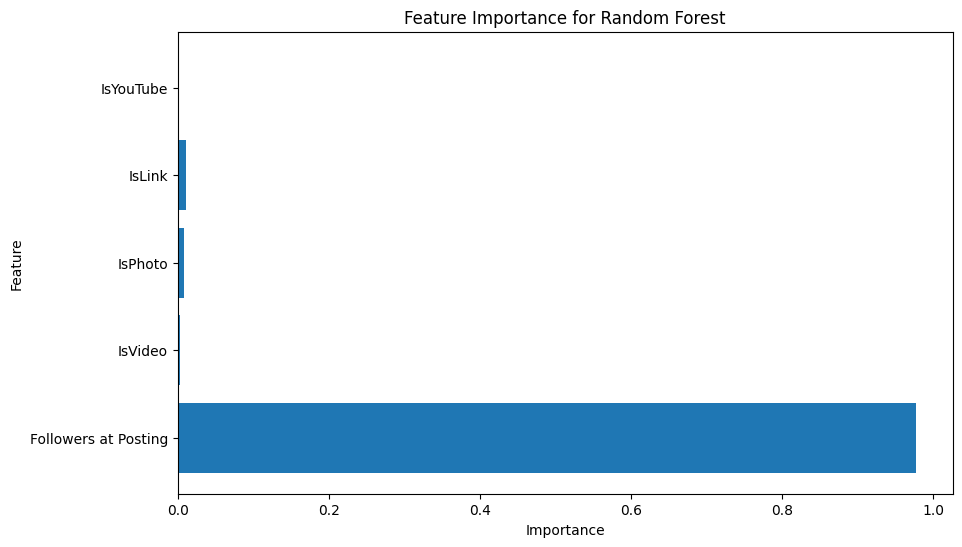

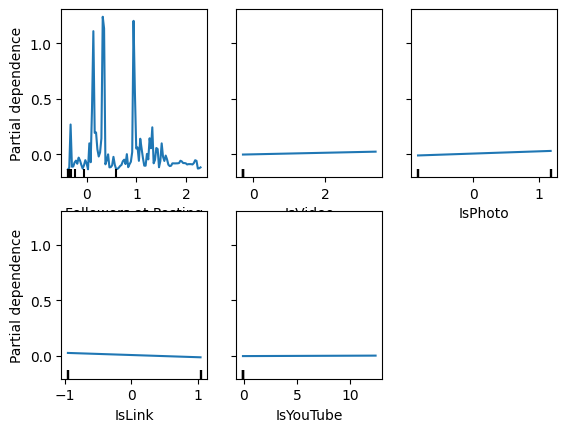

In [66]:
dataset1 = dataset1.dropna()
X = dataset1.drop(columns=['Total Interactions'])
y = dataset1['Total Interactions']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Model
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'objective': 'reg:squarederror', 'max_depth': 4, 'eta': 0.1}
num_rounds = 100
bst = xgb.train(params, dtrain, num_rounds)
preds_in = bst.predict(dtrain)
preds_out = bst.predict(dtest)
mseXG_in = mean_squared_error(y_train, preds_in)
mseXG_out = mean_squared_error(y_test, preds_out)
rmseXG_in = np.sqrt(mseXG_in)
rmseXG_out = np.sqrt(mseXG_out)
r2XG_in = r2_score(y_train, preds_in)
r2XG_out = r2_score(y_test, preds_out)

# Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf_in = rf.predict(X_train)
y_pred_rf_out = rf.predict(X_test)
mseRF_in = mean_squared_error(y_train, y_pred_rf_in)
mseRF_out = mean_squared_error(y_test, y_pred_rf_out)
rmseRF_in = np.sqrt(mseRF_in)
rmseRF_out = np.sqrt(mseRF_out)
r2RF_in = r2_score(y_train, y_pred_rf_in)
r2RF_out = r2_score(y_test, y_pred_rf_out)

# SVR Model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr_in = svr.predict(X_train_scaled)
y_pred_svr_out = svr.predict(X_test_scaled)
mseSVR_in = mean_squared_error(y_train, y_pred_svr_in)
mseSVR_out = mean_squared_error(y_test, y_pred_svr_out)
rmseSVR_in = np.sqrt(mseSVR_in)
rmseSVR_out = np.sqrt(mseSVR_out)
r2SVR_in = r2_score(y_train, y_pred_svr_in)
r2SVR_out = r2_score(y_test, y_pred_svr_out)

# Poisson Regression
y_train = y_train + 1
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)
poissonModel = sm.GLM(y_train, X_train_const, family=sm.families.Poisson()).fit()
y_pred_poisson_in = poissonModel.predict(X_train_const)
y_pred_poisson_out = poissonModel.predict(X_test_const)
msePR_in = mean_squared_error(y_train, y_pred_poisson_in)
msePR_out = mean_squared_error(y_test, y_pred_poisson_out)
rmsePR_in = np.sqrt(msePR_in)
rmsePR_out = np.sqrt(msePR_out)
r2PR_in = r2_score(y_train, y_pred_poisson_in)
r2PR_out = r2_score(y_test, y_pred_poisson_out)

# Print the summary of Poisson Regression model
print(poissonModel.summary())

# Print RMSE, MSE, and R² for both in-sample and out-sample
print(f"XGBoost - In-sample RMSE: {rmseXG_in}, MSE: {mseXG_in}, R²: {r2XG_in}")
print(f"XGBoost - Out-sample RMSE: {rmseXG_out}, MSE: {mseXG_out}, R²: {r2XG_out}")
print(f"Random Forest - In-sample RMSE: {rmseRF_in}, MSE: {mseRF_in}, R²: {r2RF_in}")
print(f"Random Forest - Out-sample RMSE: {rmseRF_out}, MSE: {mseRF_out}, R²: {r2RF_out}")
print(f"SVR - In-sample RMSE: {rmseSVR_in}, MSE: {mseSVR_in}, R²: {r2SVR_in}")
print(f"SVR - Out-sample RMSE: {rmseSVR_out}, MSE: {mseSVR_out}, R²: {r2SVR_out}")
print(f"Poisson Regression - In-sample RMSE: {rmsePR_in}, MSE: {msePR_in}, R²: {r2PR_in}")
print(f"Poisson Regression - Out-sample RMSE: {rmsePR_out}, MSE: {msePR_out}, R²: {r2PR_out}")

# Finding out the best model based on multiple metrics
metrics = {
    'XGBoost': {'RMSE_in': rmseXG_in, 'MSE_in': mseXG_in, 'R²_in': r2XG_in, 'RMSE_out': rmseXG_out, 'MSE_out': mseXG_out, 'R²_out': r2XG_out},
    'Random Forest': {'RMSE_in': rmseRF_in, 'MSE_in': mseRF_in, 'R²_in': r2RF_in, 'RMSE_out': rmseRF_out, 'MSE_out': mseRF_out, 'R²_out': r2RF_out},
    'SVR': {'RMSE_in': rmseSVR_in, 'MSE_in': mseSVR_in, 'R²_in': r2SVR_in, 'RMSE_out': rmseSVR_out, 'MSE_out': mseSVR_out, 'R²_out': r2SVR_out},
    'Poisson Regression': {'RMSE_in': rmsePR_in, 'MSE_in': msePR_in, 'R²_in': r2PR_in, 'RMSE_out': rmsePR_out, 'MSE_out': msePR_out, 'R²_out': r2PR_out}
}

# Determine the best model based on each metric
best_model_name_rmse_in = min(metrics, key=lambda x: metrics[x]['RMSE_in'])
best_model_name_mse_in = min(metrics, key=lambda x: metrics[x]['MSE_in'])
best_model_name_r2_in = max(metrics, key=lambda x: metrics[x]['R²_in'])
best_model_name_rmse_out = min(metrics, key=lambda x: metrics[x]['RMSE_out'])
best_model_name_mse_out = min(metrics, key=lambda x: metrics[x]['MSE_out'])
best_model_name_r2_out = max(metrics, key=lambda x: metrics[x]['R²_out'])

best_models = [
    best_model_name_rmse_in, best_model_name_mse_in, best_model_name_r2_in,
    best_model_name_rmse_out, best_model_name_mse_out, best_model_name_r2_out
]
best_model_counts = {model: best_models.count(model) for model in set(best_models)}

best_model_name = max(best_model_counts, key=best_model_counts.get)

print(f"Best Predictive Model: {best_model_name}")

# Plotting the Feature Importance for the best model
if best_model_name == 'XGBoost':
    model = xgb.XGBRegressor()
    model.fit(X_train, y_train)
    importance = model.feature_importances_
    features = X_train.columns
    print("Feature Importance Scores for XGBoost:")
    for feature, score in zip(features, importance):
        print(f"{feature}: {score}")
    plt.figure(figsize=(10, 6))
    plt.barh(features, importance)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance for XGBoost')
    plt.show()
elif best_model_name == 'Random Forest':
    importance = rf.feature_importances_
    features = X_train.columns
    print("Feature Importance Scores for Random Forest:")
    for feature, score in zip(features, importance):
        print(f"{feature}: {score}")
    plt.figure(figsize=(10, 6))
    plt.barh(features, importance)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance for Random Forest')
    plt.show()
elif best_model_name == 'SVR':
    print("SVR does not have built-in feature importance.")
else:
    print("Feature importance plots are not typically used for Poisson Regression.")

# Plotting the Partial Dependency Graphs for the best model
if best_model_name == 'XGBoost':
    display(PartialDependenceDisplay.from_estimator(model, X_train, features=[i for i in range(X_train.shape[1])]))
elif best_model_name == 'Random Forest':
    display(PartialDependenceDisplay.from_estimator(rf, X_train, features=[i for i in range(X_train.shape[1])]))
elif best_model_name == 'SVR':
    display(PartialDependenceDisplay.from_estimator(svr, X_train_scaled, features=[i for i in range(X_train_scaled.shape[1])]))
else:
    print("Partial dependence plots are not typically used for Poisson Regression.")

Correlation Matrix:
                      Followers at Posting   IsVideo   IsPhoto    IsLink  \
Followers at Posting              1.000000  0.085687 -0.215303  0.180293   
IsVideo                           0.085687  1.000000 -0.248473 -0.277430   
IsPhoto                          -0.215303 -0.248473  1.000000 -0.812456   
IsLink                            0.180293 -0.277430 -0.812456  1.000000   
IsYouTube                        -0.023209 -0.021006 -0.061515 -0.068684   

                      IsYouTube  
Followers at Posting  -0.023209  
IsVideo               -0.021006  
IsPhoto               -0.061515  
IsLink                -0.068684  
IsYouTube              1.000000  


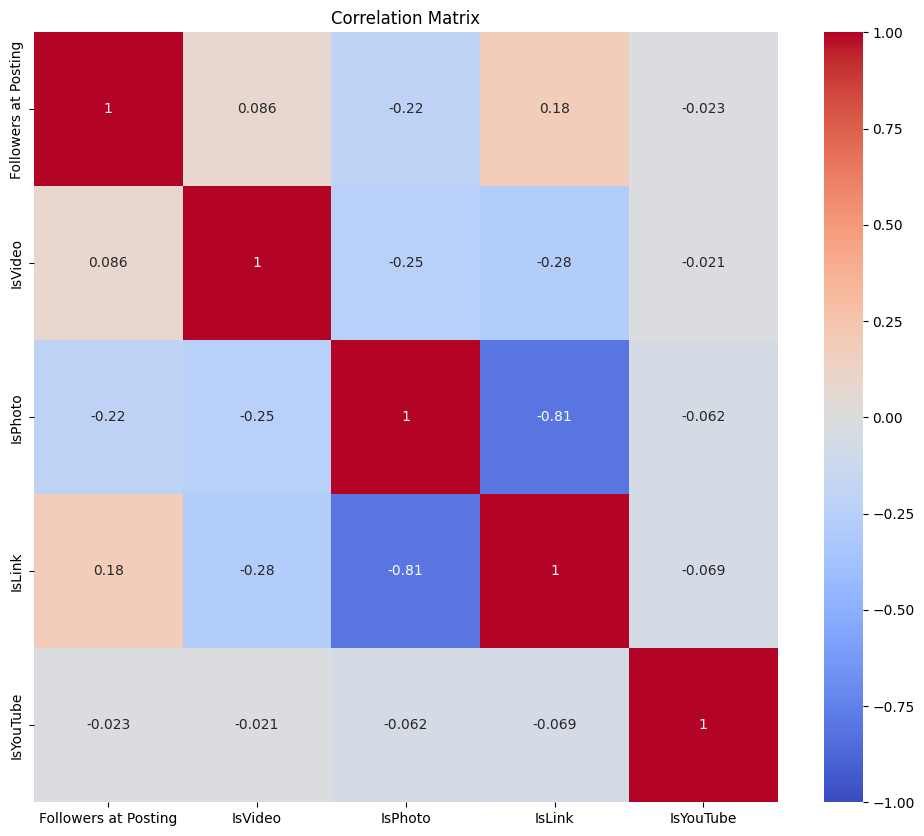

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix
correlation_matrix = X_train.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

In [68]:
# Baseline + Topic Distribution Model
dataset2 = dataset.drop(columns=['Topic_1_Valence','Topic_2_Valence','Topic_3_Valence','Topic_4_Valence','Topic_5_Valence','Topic_6_Valence','Topic_7_Valence','Topic_8_Valence','Topic_9_Valence','Topic_10_Valence','Topic_11_Valence','Topic_12_Valence','FOG_Score','NRC_Emotions'])

In [69]:
# Function to clean and convert columns to numeric
def clean_column(column):
  return pd.to_numeric(column.str.replace(',', ''), errors='coerce', downcast='float')

for column in dataset2.columns:
    if dataset2[column].dtype == 'object':
        try:
            dataset2[column] = clean_column(dataset2[column])
        except Exception as e:
            print(f"Could not convert column {column}: {e}")

# Calculating mean and standard deviation for each column
column_means = dataset2.mean()
column_std = dataset2.std()

# Standardizing each entry in the dataset
for column in dataset2.columns:
    if dataset2[column].dtype != 'object':
        dataset2[column] = (dataset2[column] - column_means[column]) / column_std[column]
dataset2

,Followers at Posting,Total Interactions,Topic_1_Distribution,Topic_2_Distribution,Topic_3_Distribution,Topic_4_Distribution,Topic_5_Distribution,Topic_6_Distribution,Topic_7_Distribution,Topic_8_Distribution,Topic_9_Distribution,Topic_10_Distribution,Topic_11_Distribution,Topic_12_Distribution,IsVideo,IsPhoto,IsLink,IsYouTube
0,-0.291769,40.299606,-0.233843,-0.028526,-0.596245,-0.285188,-0.529166,-0.218449,-0.404019,-0.253380,2.876340,-0.396715,-0.729265,-0.485251,-0.292773,-0.844949,1.044167,-0.080631
1,-0.377212,26.494143,-0.180414,-0.302121,-0.380356,-0.290105,-0.378348,7.193781,-0.670806,-0.257101,-0.764143,-0.229716,-0.737339,-0.420323,-0.292773,1.183220,-0.957472,-0.080631
2,-0.377909,23.034407,-0.332832,-0.297330,0.984856,-0.283463,-0.526721,-0.217539,-0.120966,-0.252075,-0.167856,-0.394721,-0.726474,1.695116,-0.292773,1.183220,-0.957472,-0.080631
3,-0.355912,18.175327,-0.336799,-0.302247,-0.601331,-0.290281,-0.536391,8.521295,-0.695063,-0.257234,-0.827184,-0.402602,-0.737642,-0.490506,-0.292773,1.183220,-0.957472,-0.080631
4,0.313409,12.643240,-0.336934,-0.061799,-0.601562,-0.290512,-0.175960,-0.221258,-0.064644,0.115076,-0.680955,-0.136458,2.628474,-0.344892,-0.292773,-0.844949,-0.957472,-0.080631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,-0.378718,-0.149365,-0.321547,-0.283341,-0.575158,-0.264064,-0.499212,-0.207304,2.658903,-0.237399,0.175562,-0.372300,-0.694694,-0.463460,-0.292773,1.183220,-0.957472,-0.080631
4175,-0.369049,-0.149365,-0.335940,-0.301183,2.244021,-0.288805,-0.534297,-0.220358,-0.692927,-0.256117,-0.824486,-0.400896,-0.735223,1.854340,-0.292773,1.183220,-0.957472,-0.080631
4176,-0.206553,-0.149365,-0.316609,-0.277220,-0.566681,4.143307,-0.487164,-0.202825,-0.645051,1.683875,-0.765082,-0.362489,-0.680805,1.577315,-0.292773,-0.844949,1.044167,-0.080631
4177,-0.355424,-0.149365,1.749901,-0.293003,-0.588532,-0.277462,0.583982,-0.214373,-0.201345,-0.247535,-0.803721,-0.387786,0.937725,-0.477282,-0.292773,1.183220,-0.957472,-0.080631


                 Generalized Linear Model Regression Results                  
Dep. Variable:     Total Interactions   No. Observations:                 3286
Model:                            GLM   Df Residuals:                     3268
Model Family:                 Poisson   Df Model:                           17
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3620.4
Date:                Fri, 12 Jul 2024   Deviance:                       841.60
Time:                        10:32:40   Pearson chi2:                 3.27e+03
No. Iterations:                     5   Pseudo R-squ. (CS):            0.01468
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

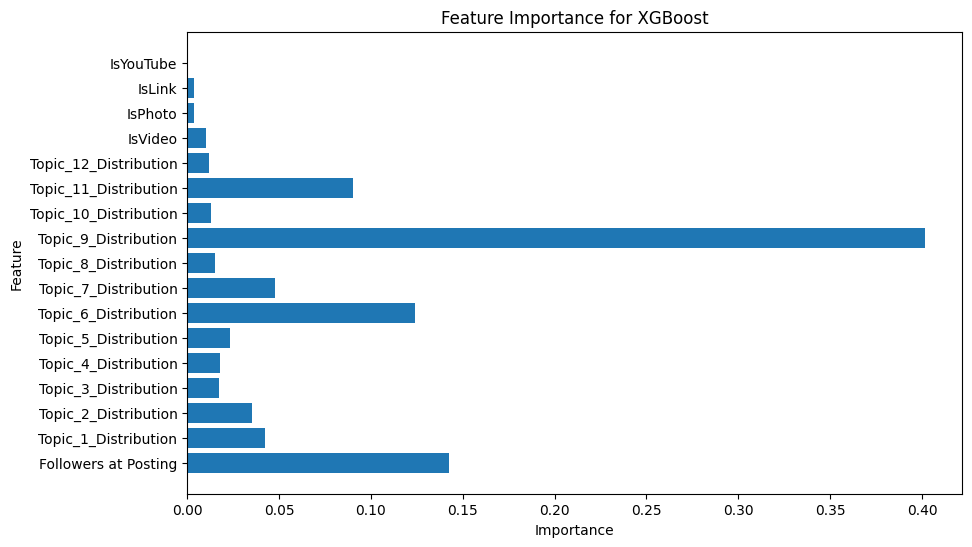

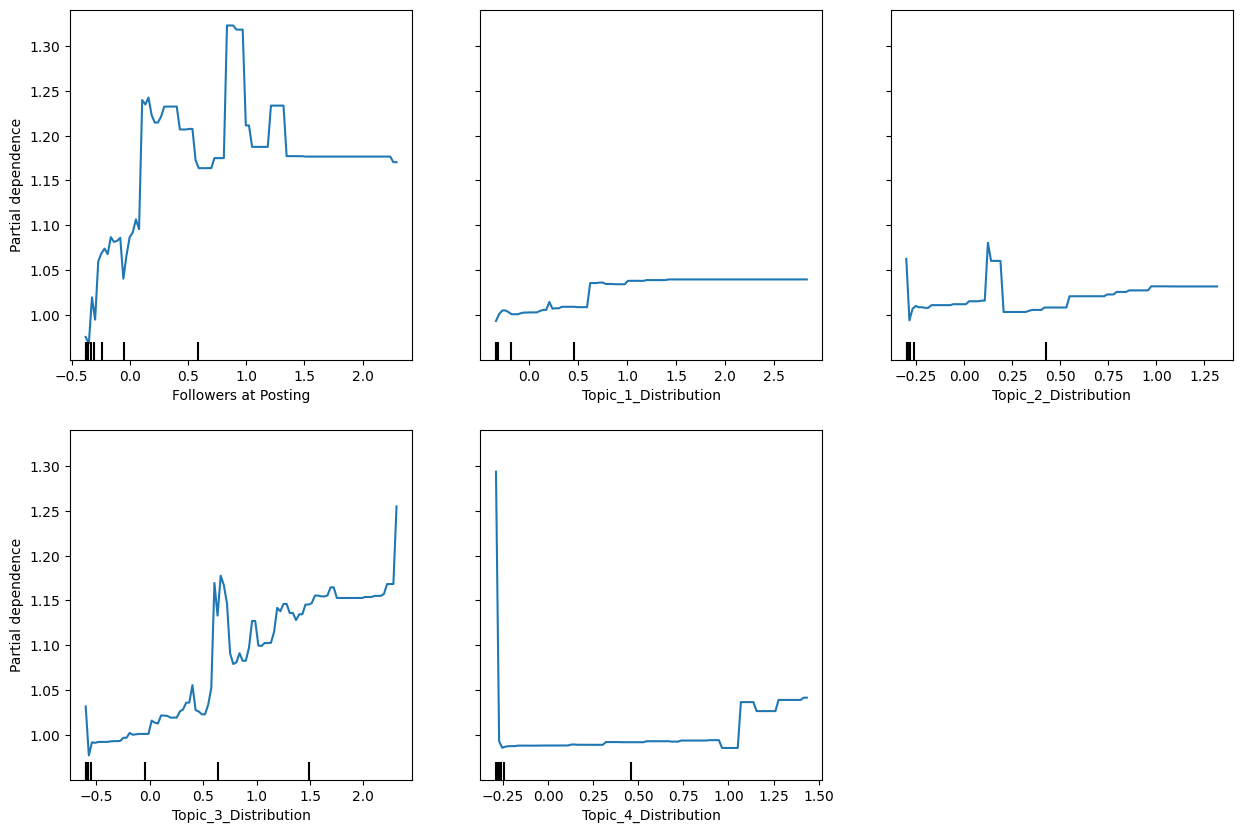

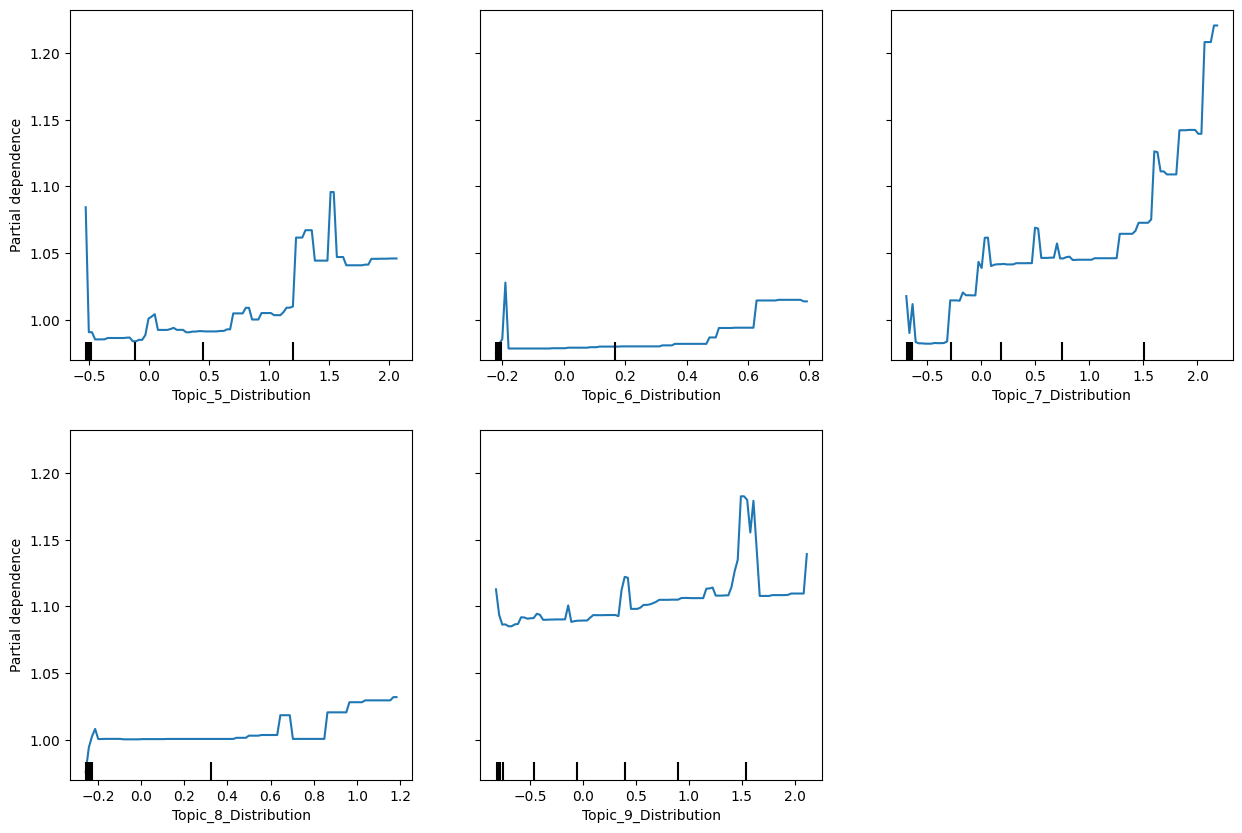

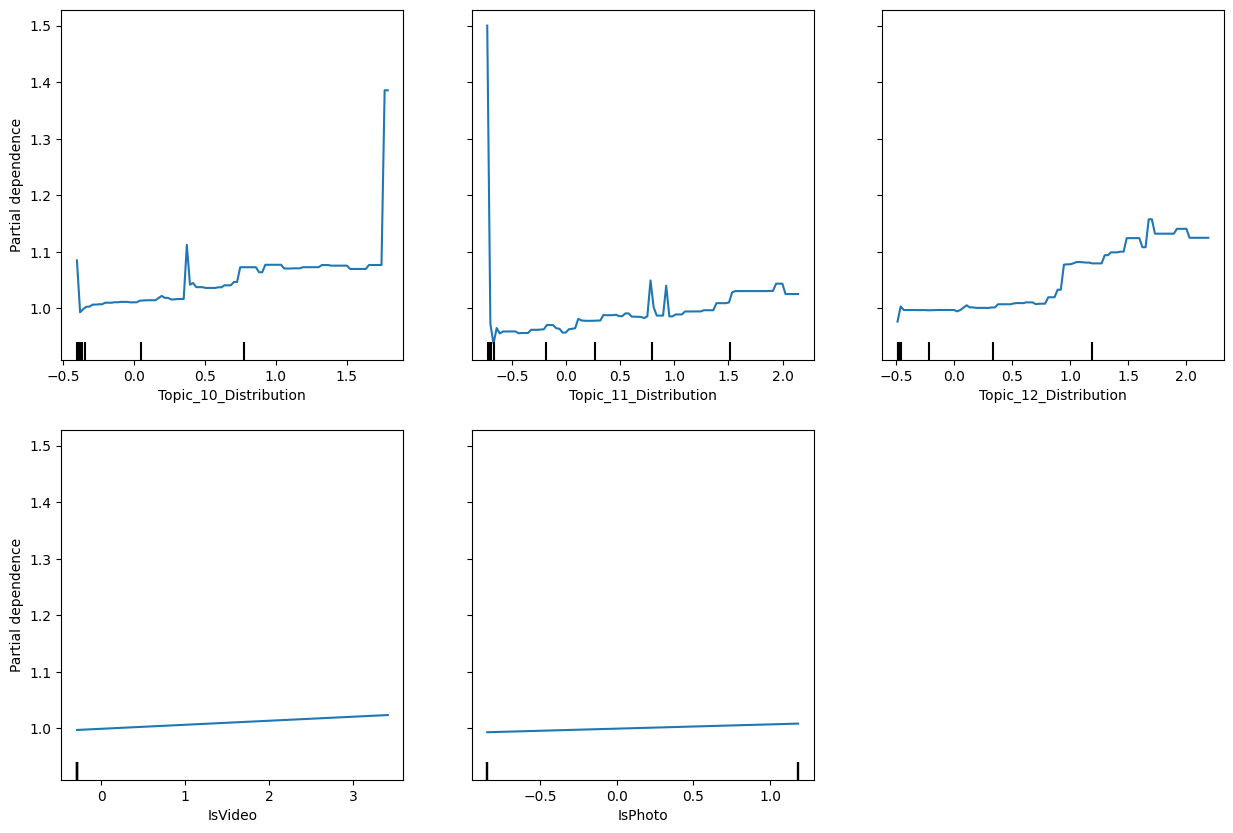

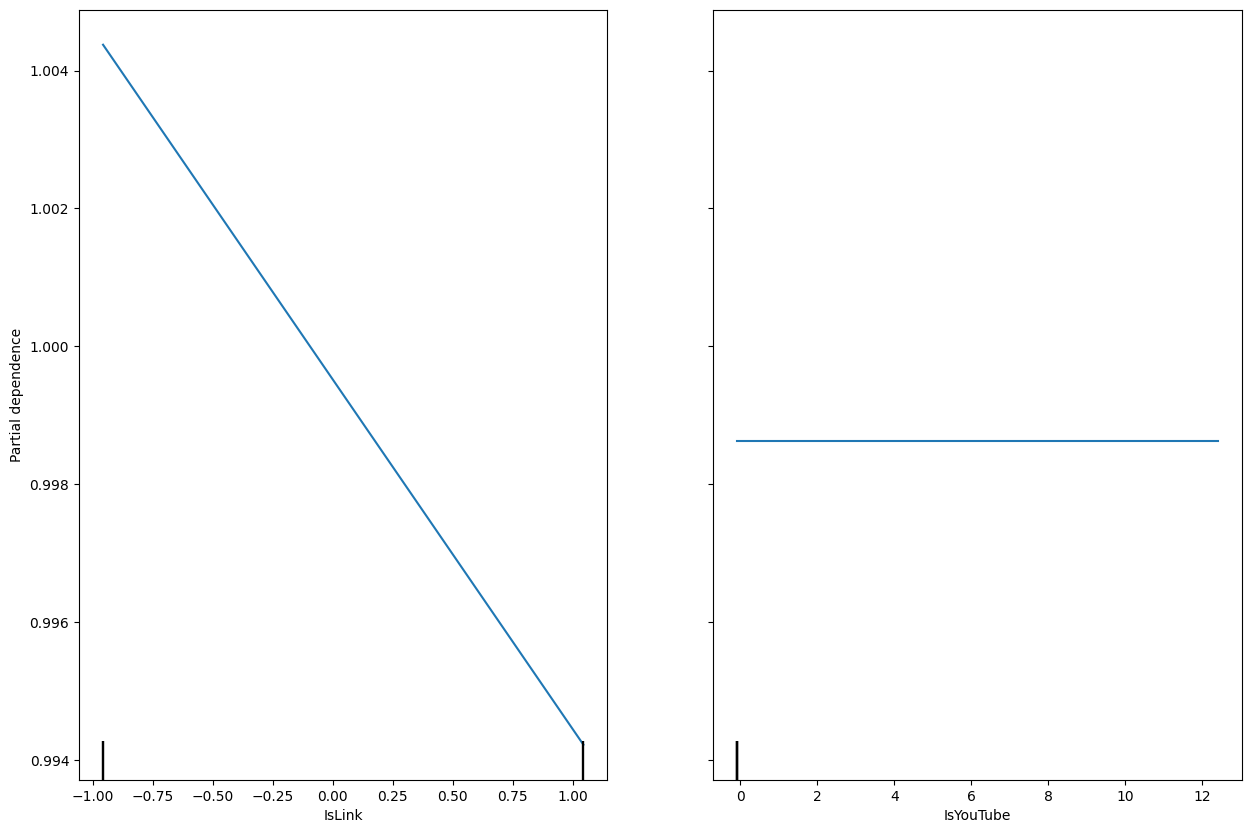

In [70]:
dataset2 = dataset2.dropna()
X = dataset2.drop(columns=['Total Interactions'])
y = dataset2['Total Interactions']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Model
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'objective': 'reg:squarederror', 'max_depth': 4, 'eta': 0.1}
num_rounds = 100
bst = xgb.train(params, dtrain, num_rounds)
preds_in = bst.predict(dtrain)
preds_out = bst.predict(dtest)
mseXG_in = mean_squared_error(y_train, preds_in)
mseXG_out = mean_squared_error(y_test, preds_out)
rmseXG_in = np.sqrt(mseXG_in)
rmseXG_out = np.sqrt(mseXG_out)
r2XG_in = r2_score(y_train, preds_in)
r2XG_out = r2_score(y_test, preds_out)

# Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf_in = rf.predict(X_train)
y_pred_rf_out = rf.predict(X_test)
mseRF_in = mean_squared_error(y_train, y_pred_rf_in)
mseRF_out = mean_squared_error(y_test, y_pred_rf_out)
rmseRF_in = np.sqrt(mseRF_in)
rmseRF_out = np.sqrt(mseRF_out)
r2RF_in = r2_score(y_train, y_pred_rf_in)
r2RF_out = r2_score(y_test, y_pred_rf_out)

# SVR Model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr_in = svr.predict(X_train_scaled)
y_pred_svr_out = svr.predict(X_test_scaled)
mseSVR_in = mean_squared_error(y_train, y_pred_svr_in)
mseSVR_out = mean_squared_error(y_test, y_pred_svr_out)
rmseSVR_in = np.sqrt(mseSVR_in)
rmseSVR_out = np.sqrt(mseSVR_out)
r2SVR_in = r2_score(y_train, y_pred_svr_in)
r2SVR_out = r2_score(y_test, y_pred_svr_out)

# Poisson Regression
y_train = y_train + 1
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)
poissonModel = sm.GLM(y_train, X_train_const, family=sm.families.Poisson()).fit()
y_pred_poisson_in = poissonModel.predict(X_train_const)
y_pred_poisson_out = poissonModel.predict(X_test_const)
msePR_in = mean_squared_error(y_train, y_pred_poisson_in)
msePR_out = mean_squared_error(y_test, y_pred_poisson_out)
rmsePR_in = np.sqrt(msePR_in)
rmsePR_out = np.sqrt(msePR_out)
r2PR_in = r2_score(y_train, y_pred_poisson_in)
r2PR_out = r2_score(y_test, y_pred_poisson_out)

# Print the summary of Poisson Regression model
print(poissonModel.summary())

# Print RMSE, MSE, and R² for both in-sample and out-sample
print(f"XGBoost - In-sample RMSE: {rmseXG_in}, MSE: {mseXG_in}, R²: {r2XG_in}")
print(f"XGBoost - Out-sample RMSE: {rmseXG_out}, MSE: {mseXG_out}, R²: {r2XG_out}")
print(f"Random Forest - In-sample RMSE: {rmseRF_in}, MSE: {mseRF_in}, R²: {r2RF_in}")
print(f"Random Forest - Out-sample RMSE: {rmseRF_out}, MSE: {mseRF_out}, R²: {r2RF_out}")
print(f"SVR - In-sample RMSE: {rmseSVR_in}, MSE: {mseSVR_in}, R²: {r2SVR_in}")
print(f"SVR - Out-sample RMSE: {rmseSVR_out}, MSE: {mseSVR_out}, R²: {r2SVR_out}")
print(f"Poisson Regression - In-sample RMSE: {rmsePR_in}, MSE: {msePR_in}, R²: {r2PR_in}")
print(f"Poisson Regression - Out-sample RMSE: {rmsePR_out}, MSE: {msePR_out}, R²: {r2PR_out}")

# Finding out the best model based on multiple metrics
metrics = {
    'XGBoost': {'RMSE_in': rmseXG_in, 'MSE_in': mseXG_in, 'R²_in': r2XG_in, 'RMSE_out': rmseXG_out, 'MSE_out': mseXG_out, 'R²_out': r2XG_out},
    'Random Forest': {'RMSE_in': rmseRF_in, 'MSE_in': mseRF_in, 'R²_in': r2RF_in, 'RMSE_out': rmseRF_out, 'MSE_out': mseRF_out, 'R²_out': r2RF_out},
    'SVR': {'RMSE_in': rmseSVR_in, 'MSE_in': mseSVR_in, 'R²_in': r2SVR_in, 'RMSE_out': rmseSVR_out, 'MSE_out': mseSVR_out, 'R²_out': r2SVR_out},
    'Poisson Regression': {'RMSE_in': rmsePR_in, 'MSE_in': msePR_in, 'R²_in': r2PR_in, 'RMSE_out': rmsePR_out, 'MSE_out': msePR_out, 'R²_out': r2PR_out}
}

# Determine the best model based on each metric
best_model_name_rmse_in = min(metrics, key=lambda x: metrics[x]['RMSE_in'])
best_model_name_mse_in = min(metrics, key=lambda x: metrics[x]['MSE_in'])
best_model_name_r2_in = max(metrics, key=lambda x: metrics[x]['R²_in'])
best_model_name_rmse_out = min(metrics, key=lambda x: metrics[x]['RMSE_out'])
best_model_name_mse_out = min(metrics, key=lambda x: metrics[x]['MSE_out'])
best_model_name_r2_out = max(metrics, key=lambda x: metrics[x]['R²_out'])

best_models = [
    best_model_name_rmse_in, best_model_name_mse_in, best_model_name_r2_in,
    best_model_name_rmse_out, best_model_name_mse_out, best_model_name_r2_out
]
best_model_counts = {model: best_models.count(model) for model in set(best_models)}

best_model_name = max(best_model_counts, key=best_model_counts.get)

print(f"Best Predictive Model: {best_model_name}")

# Plotting the Feature Importance for the best model
if best_model_name == 'XGBoost':
    model = xgb.XGBRegressor()
    model.fit(X_train, y_train)
    importance = model.feature_importances_
    features = X_train.columns
    print("Feature Importance Scores for XGBoost:")
    for feature, score in zip(features, importance):
        print(f"{feature}: {score}")
    plt.figure(figsize=(10, 6))
    plt.barh(features, importance)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance for XGBoost')
    plt.show()
elif best_model_name == 'Random Forest':
    importance = rf.feature_importances_
    features = X_train.columns
    print("Feature Importance Scores for Random Forest:")
    for feature, score in zip(features, importance):
        print(f"{feature}: {score}")
    plt.figure(figsize=(10, 6))
    plt.barh(features, importance)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance for Random Forest')
    plt.show()
elif best_model_name == 'SVR':
    print("SVR does not have built-in feature importance.")
else:
    print("Feature importance plots are not typically used for Poisson Regression.")

# Plotting the Partial Dependency Graphs for the best model
def plot_partial_dependence(model, X_train, n_features=5):
    features = [i for i in range(X_train.shape[1])]
    for i in range(0, len(features), n_features):
        subset = features[i:i + n_features]
        fig, ax = plt.subplots(figsize=(15, 10))
        PartialDependenceDisplay.from_estimator(model, X_train, features=subset, ax=ax)
        plt.show()

if best_model_name == 'XGBoost':
    plot_partial_dependence(model, X_train)
elif best_model_name == 'Random Forest':
    plot_partial_dependence(rf, X_train)
elif best_model_name == 'SVR':
    plot_partial_dependence(svr, X_train_scaled)
else:
    print("Partial dependence plots are not typically used for Poisson Regression.")

Correlation Matrix:
                       Followers at Posting  Topic_1_Distribution  \
Followers at Posting               1.000000              0.034096   
Topic_1_Distribution               0.034096              1.000000   
Topic_2_Distribution              -0.041509             -0.045478   
Topic_3_Distribution               0.023639             -0.131938   
Topic_4_Distribution              -0.018019             -0.037295   
Topic_5_Distribution              -0.006047             -0.062250   
Topic_6_Distribution               0.011630             -0.048174   
Topic_7_Distribution               0.102335             -0.157007   
Topic_8_Distribution               0.010371             -0.049196   
Topic_9_Distribution              -0.091968             -0.214505   
Topic_10_Distribution              0.108620             -0.089848   
Topic_11_Distribution             -0.093115             -0.130384   
Topic_12_Distribution             -0.011434             -0.081798   
IsVideo       

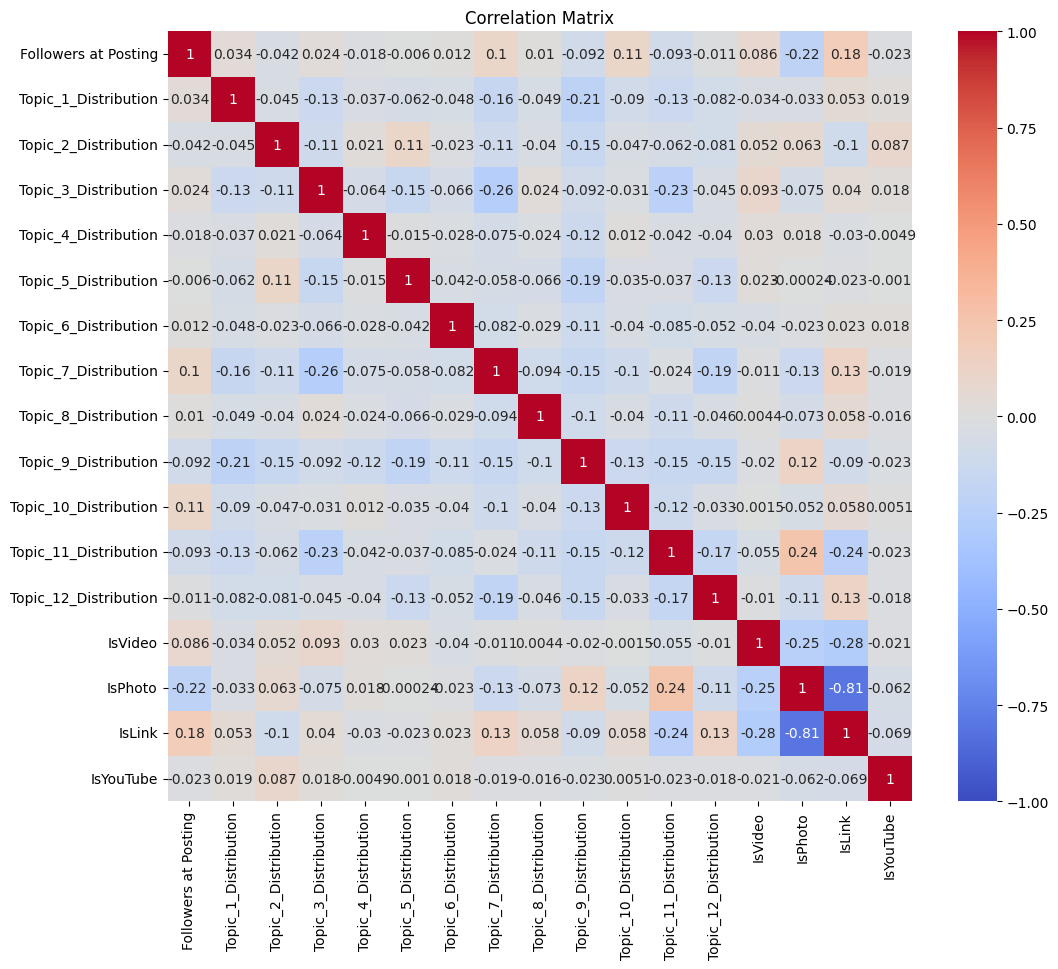

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix
correlation_matrix = X_train.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

In [72]:
# Baseline + Topic Variance + topic distribution model
dataset3 = dataset.drop(columns=['FOG_Score','NRC_Emotions'])

In [73]:
# Function to clean and convert columns to numeric
def clean_column(column):
  return pd.to_numeric(column.str.replace(',', ''), errors='coerce', downcast='float')

for column in dataset3.columns:
    if dataset3[column].dtype == 'object':
        try:
            dataset3[column] = clean_column(dataset3[column])
        except Exception as e:
            print(f"Could not convert column {column}: {e}")

# Calculating mean and standard deviation for each column
column_means = dataset3.mean()
column_std = dataset3.std()

# Standardizing each entry in the dataset
for column in dataset3.columns:
    if dataset3[column].dtype != 'object':
        dataset3[column] = (dataset3[column] - column_means[column]) / column_std[column]
dataset3

,Followers at Posting,Total Interactions,Topic_1_Distribution,Topic_2_Distribution,Topic_3_Distribution,Topic_4_Distribution,Topic_5_Distribution,Topic_6_Distribution,Topic_7_Distribution,Topic_8_Distribution,...,Topic_7_Valence,Topic_8_Valence,Topic_9_Valence,Topic_10_Valence,Topic_11_Valence,Topic_12_Valence,IsVideo,IsPhoto,IsLink,IsYouTube
0,-0.291769,40.299606,-0.233843,-0.028526,-0.596245,-0.285188,-0.529166,-0.218449,-0.404019,-0.253380,...,-0.404019,-0.253380,2.876340,-0.396715,-0.729265,0.485251,-0.292773,-0.844949,1.044167,-0.080631
1,-0.377212,26.494143,-0.180414,-0.302121,-0.380356,-0.290105,-0.378348,7.193781,-0.670806,-0.257101,...,-0.670806,-0.257101,-0.764143,-0.229716,-0.737339,0.420323,-0.292773,1.183220,-0.957472,-0.080631
2,-0.377909,23.034407,-0.332832,-0.297330,0.984856,-0.283463,-0.526721,-0.217539,-0.120966,-0.252075,...,-0.120966,-0.252075,-0.167856,-0.394721,-0.726474,-1.695116,-0.292773,1.183220,-0.957472,-0.080631
3,-0.355912,18.175327,-0.336799,-0.302247,-0.601331,-0.290281,-0.536391,8.521295,-0.695063,-0.257234,...,-0.695063,-0.257234,-0.827184,-0.402602,-0.737642,0.490506,-0.292773,1.183220,-0.957472,-0.080631
4,0.313409,12.643240,-0.336934,-0.061799,-0.601562,-0.290512,-0.175960,-0.221258,-0.064644,0.115076,...,-0.064644,0.115076,-0.680955,-0.136458,2.628474,0.344892,-0.292773,-0.844949,-0.957472,-0.080631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,-0.378718,-0.149365,-0.321547,-0.283341,-0.575158,-0.264064,-0.499212,-0.207304,2.658903,-0.237399,...,2.658903,-0.237399,0.175562,-0.372300,-0.694694,0.463460,-0.292773,1.183220,-0.957472,-0.080631
4175,-0.369049,-0.149365,-0.335940,-0.301183,2.244021,-0.288805,-0.534297,-0.220358,-0.692927,-0.256117,...,-0.692927,-0.256117,-0.824486,-0.400896,-0.735223,-1.854340,-0.292773,1.183220,-0.957472,-0.080631
4176,-0.206553,-0.149365,-0.316609,-0.277220,-0.566681,4.143307,-0.487164,-0.202825,-0.645051,1.683875,...,-0.645051,1.683875,-0.765082,-0.362489,-0.680805,-1.577315,-0.292773,-0.844949,1.044167,-0.080631
4177,-0.355424,-0.149365,1.749901,-0.293003,-0.588532,-0.277462,0.583982,-0.214373,-0.201345,-0.247535,...,-0.201345,-0.247535,-0.803721,-0.387786,0.937726,0.477282,-0.292773,1.183220,-0.957472,-0.080631


                 Generalized Linear Model Regression Results                  
Dep. Variable:     Total Interactions   No. Observations:                 3286
Model:                            GLM   Df Residuals:                     3256
Model Family:                 Poisson   Df Model:                           29
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3614.9
Date:                Fri, 12 Jul 2024   Deviance:                       830.67
Time:                        10:34:12   Pearson chi2:                 3.16e+03
No. Iterations:                    72   Pseudo R-squ. (CS):            0.01795
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

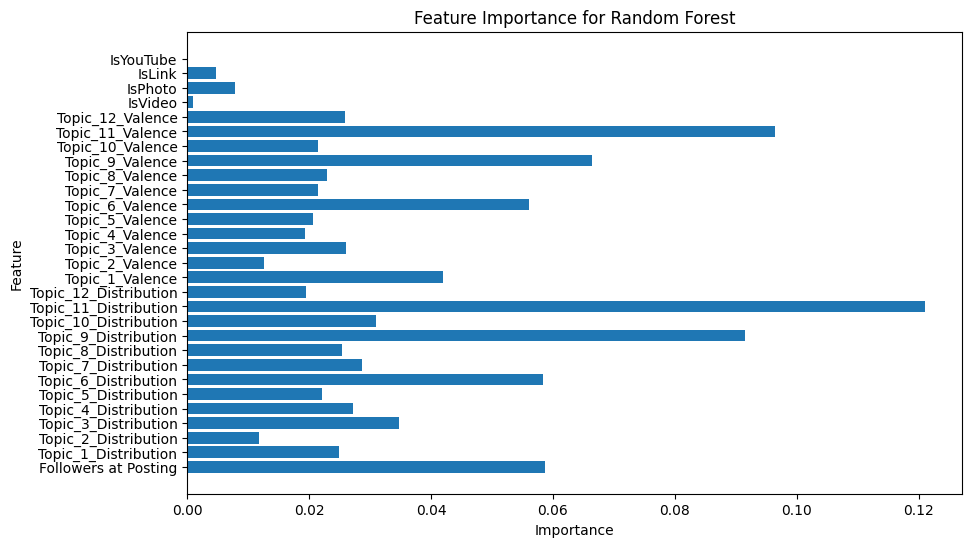

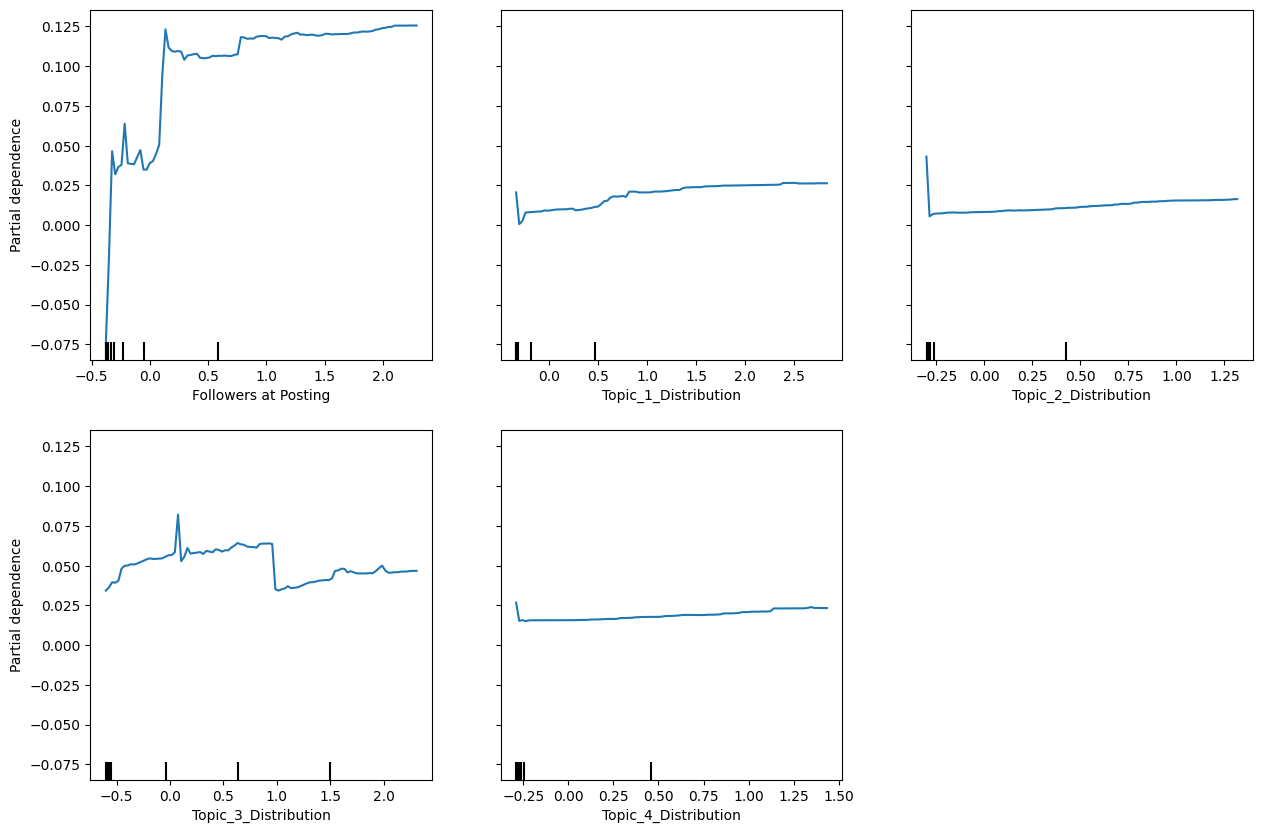

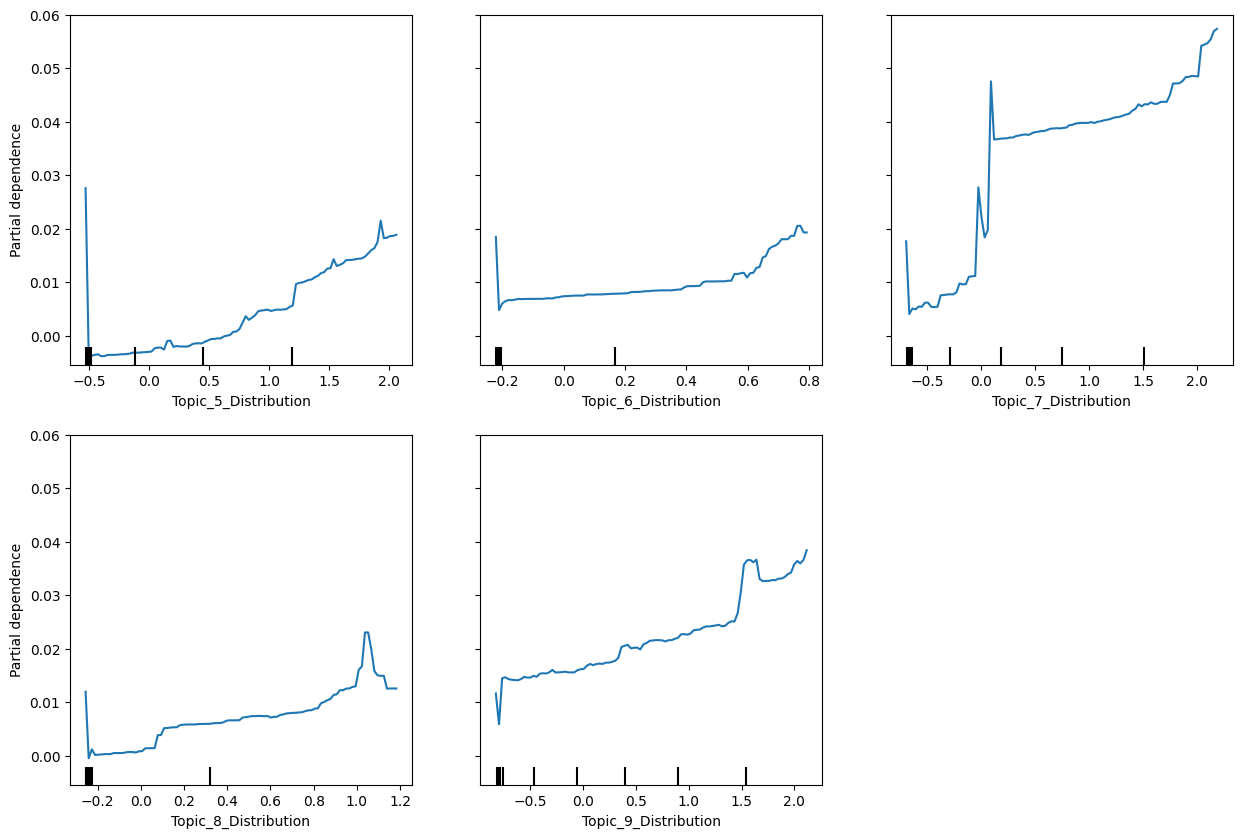

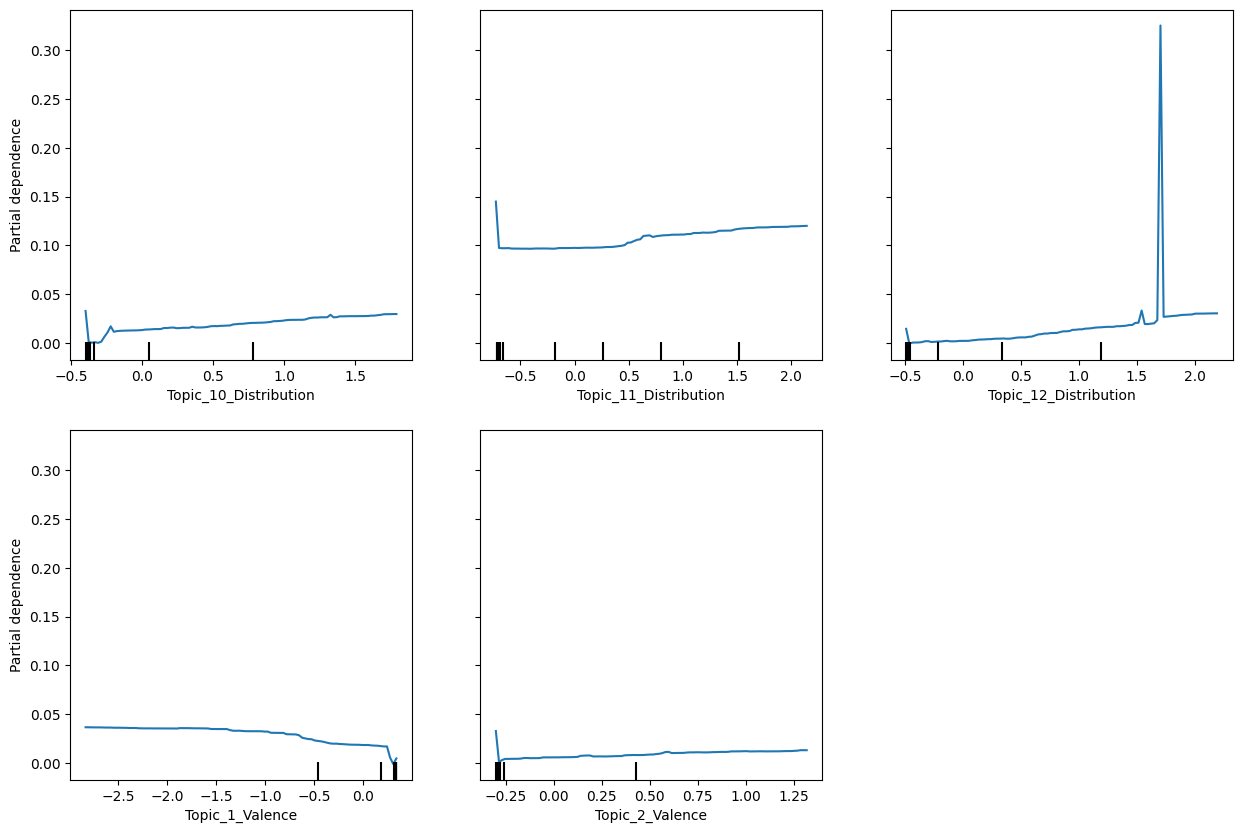

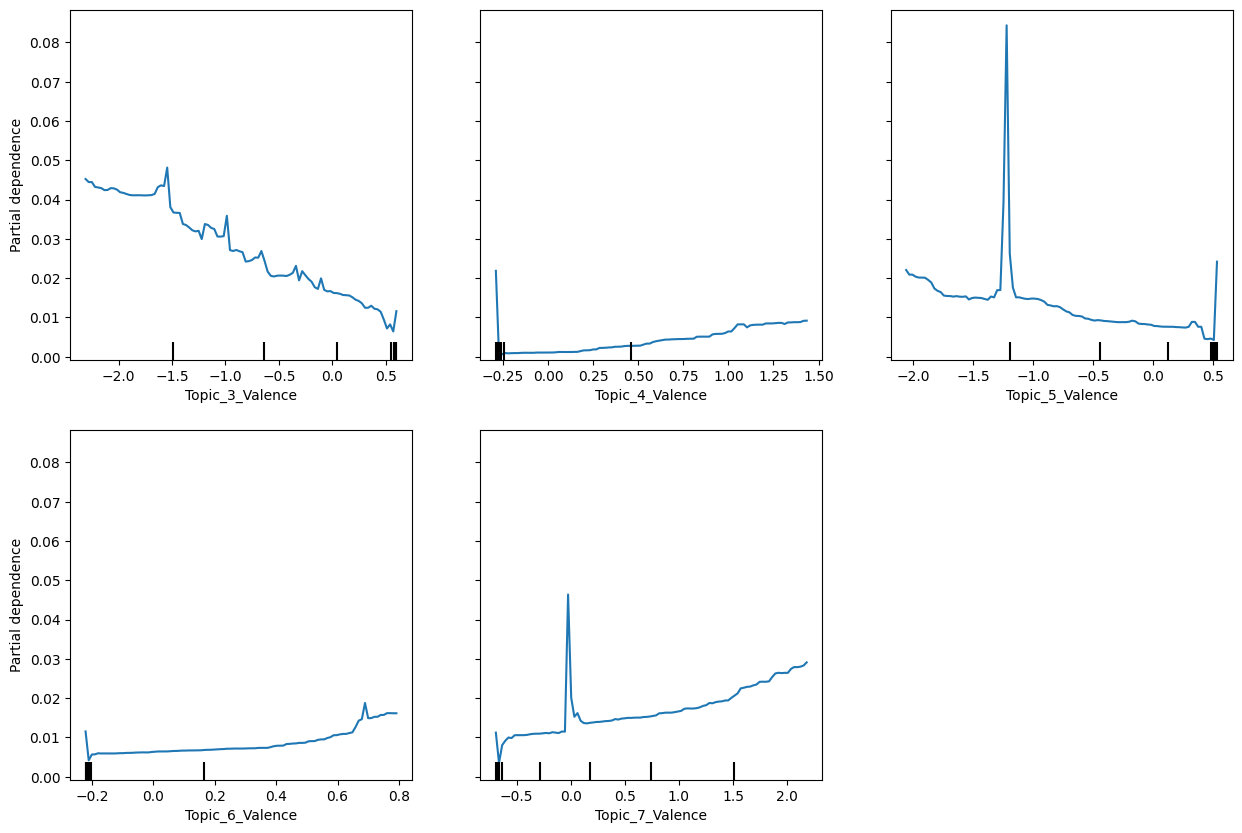

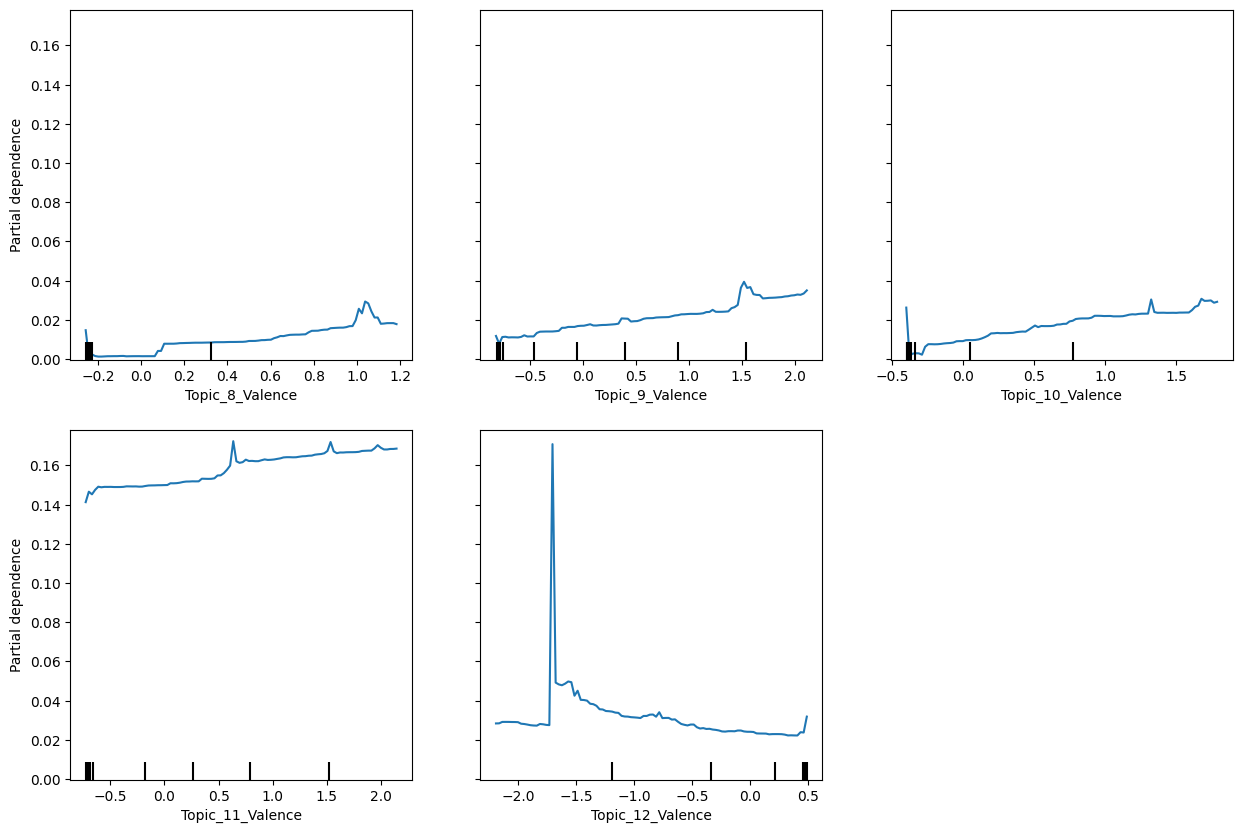

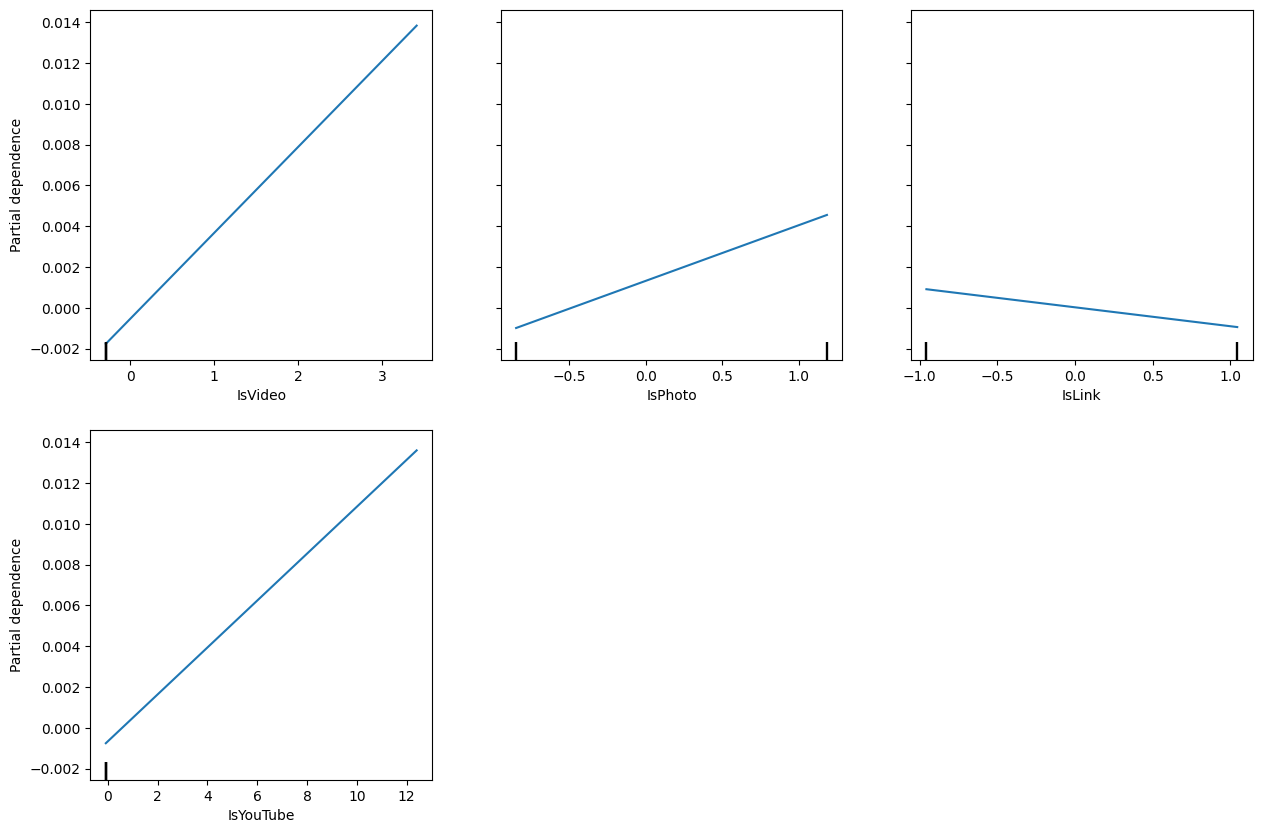

In [74]:
dataset3 = dataset3.dropna()
X = dataset3.drop(columns=['Total Interactions'])
y = dataset3['Total Interactions']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Model
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {'objective': 'reg:squarederror', 'max_depth': 4, 'eta': 0.1}
num_rounds = 100
bst = xgb.train(params, dtrain, num_rounds)
preds_in = bst.predict(dtrain)
preds_out = bst.predict(dtest)
mseXG_in = mean_squared_error(y_train, preds_in)
mseXG_out = mean_squared_error(y_test, preds_out)
rmseXG_in = np.sqrt(mseXG_in)
rmseXG_out = np.sqrt(mseXG_out)
r2XG_in = r2_score(y_train, preds_in)
r2XG_out = r2_score(y_test, preds_out)

# Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf_in = rf.predict(X_train)
y_pred_rf_out = rf.predict(X_test)
mseRF_in = mean_squared_error(y_train, y_pred_rf_in)
mseRF_out = mean_squared_error(y_test, y_pred_rf_out)
rmseRF_in = np.sqrt(mseRF_in)
rmseRF_out = np.sqrt(mseRF_out)
r2RF_in = r2_score(y_train, y_pred_rf_in)
r2RF_out = r2_score(y_test, y_pred_rf_out)

# SVR Model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr_in = svr.predict(X_train_scaled)
y_pred_svr_out = svr.predict(X_test_scaled)
mseSVR_in = mean_squared_error(y_train, y_pred_svr_in)
mseSVR_out = mean_squared_error(y_test, y_pred_svr_out)
rmseSVR_in = np.sqrt(mseSVR_in)
rmseSVR_out = np.sqrt(mseSVR_out)
r2SVR_in = r2_score(y_train, y_pred_svr_in)
r2SVR_out = r2_score(y_test, y_pred_svr_out)

# Poisson Regression
y_train = y_train + 1
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)
poissonModel = sm.GLM(y_train, X_train_const, family=sm.families.Poisson()).fit()
y_pred_poisson_in = poissonModel.predict(X_train_const)
y_pred_poisson_out = poissonModel.predict(X_test_const)
msePR_in = mean_squared_error(y_train, y_pred_poisson_in)
msePR_out = mean_squared_error(y_test, y_pred_poisson_out)
rmsePR_in = np.sqrt(msePR_in)
rmsePR_out = np.sqrt(msePR_out)
r2PR_in = r2_score(y_train, y_pred_poisson_in)
r2PR_out = r2_score(y_test, y_pred_poisson_out)

# Print the summary of Poisson Regression model
print(poissonModel.summary())

# Print RMSE, MSE, and R² for both in-sample and out-sample
print(f"XGBoost - In-sample RMSE: {rmseXG_in}, MSE: {mseXG_in}, R²: {r2XG_in}")
print(f"XGBoost - Out-sample RMSE: {rmseXG_out}, MSE: {mseXG_out}, R²: {r2XG_out}")
print(f"Random Forest - In-sample RMSE: {rmseRF_in}, MSE: {mseRF_in}, R²: {r2RF_in}")
print(f"Random Forest - Out-sample RMSE: {rmseRF_out}, MSE: {mseRF_out}, R²: {r2RF_out}")
print(f"SVR - In-sample RMSE: {rmseSVR_in}, MSE: {mseSVR_in}, R²: {r2SVR_in}")
print(f"SVR - Out-sample RMSE: {rmseSVR_out}, MSE: {mseSVR_out}, R²: {r2SVR_out}")
print(f"Poisson Regression - In-sample RMSE: {rmsePR_in}, MSE: {msePR_in}, R²: {r2PR_in}")
print(f"Poisson Regression - Out-sample RMSE: {rmsePR_out}, MSE: {msePR_out}, R²: {r2PR_out}")

# Finding out the best model based on multiple metrics
metrics = {
    'XGBoost': {'RMSE_in': rmseXG_in, 'MSE_in': mseXG_in, 'R²_in': r2XG_in, 'RMSE_out': rmseXG_out, 'MSE_out': mseXG_out, 'R²_out': r2XG_out},
    'Random Forest': {'RMSE_in': rmseRF_in, 'MSE_in': mseRF_in, 'R²_in': r2RF_in, 'RMSE_out': rmseRF_out, 'MSE_out': mseRF_out, 'R²_out': r2RF_out},
    'SVR': {'RMSE_in': rmseSVR_in, 'MSE_in': mseSVR_in, 'R²_in': r2SVR_in, 'RMSE_out': rmseSVR_out, 'MSE_out': mseSVR_out, 'R²_out': r2SVR_out},
    'Poisson Regression': {'RMSE_in': rmsePR_in, 'MSE_in': msePR_in, 'R²_in': r2PR_in, 'RMSE_out': rmsePR_out, 'MSE_out': msePR_out, 'R²_out': r2PR_out}
}

# Determine the best model based on each metric
best_model_name_rmse_in = min(metrics, key=lambda x: metrics[x]['RMSE_in'])
best_model_name_mse_in = min(metrics, key=lambda x: metrics[x]['MSE_in'])
best_model_name_r2_in = max(metrics, key=lambda x: metrics[x]['R²_in'])
best_model_name_rmse_out = min(metrics, key=lambda x: metrics[x]['RMSE_out'])
best_model_name_mse_out = min(metrics, key=lambda x: metrics[x]['MSE_out'])
best_model_name_r2_out = max(metrics, key=lambda x: metrics[x]['R²_out'])

best_models = [
    best_model_name_rmse_in, best_model_name_mse_in, best_model_name_r2_in,
    best_model_name_rmse_out, best_model_name_mse_out, best_model_name_r2_out
]
best_model_counts = {model: best_models.count(model) for model in set(best_models)}

best_model_name = max(best_model_counts, key=best_model_counts.get)

print(f"Best Predictive Model: {best_model_name}")

# Plotting the Feature Importance for the best model
if best_model_name == 'XGBoost':
    model = xgb.XGBRegressor()
    model.fit(X_train, y_train)
    importance = model.feature_importances_
    features = X_train.columns
    print("Feature Importance Scores for XGBoost:")
    for feature, score in zip(features, importance):
        print(f"{feature}: {score}")
    plt.figure(figsize=(10, 6))
    plt.barh(features, importance)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance for XGBoost')
    plt.show()
elif best_model_name == 'Random Forest':
    importance = rf.feature_importances_
    features = X_train.columns
    print("Feature Importance Scores for Random Forest:")
    for feature, score in zip(features, importance):
        print(f"{feature}: {score}")
    plt.figure(figsize=(10, 6))
    plt.barh(features, importance)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance for Random Forest')
    plt.show()
elif best_model_name == 'SVR':
    print("SVR does not have built-in feature importance.")
else:
    print("Feature importance plots are not typically used for Poisson Regression.")

# Plotting the Partial Dependency Graphs for the best model
def plot_partial_dependence(model, X_train, n_features=5):
    features = [i for i in range(X_train.shape[1])]
    for i in range(0, len(features), n_features):
        subset = features[i:i + n_features]
        fig, ax = plt.subplots(figsize=(15, 10))
        PartialDependenceDisplay.from_estimator(model, X_train, features=subset, ax=ax)
        plt.show()

if best_model_name == 'XGBoost':
    plot_partial_dependence(model, X_train)
elif best_model_name == 'Random Forest':
    plot_partial_dependence(rf, X_train)
elif best_model_name == 'SVR':
    plot_partial_dependence(svr, X_train_scaled)
else:
    print("Partial dependence plots are not typically used for Poisson Regression.")